# ``Estandarización``

In [1]:
# Lectura de datos
# ==============================================================================
import pickle

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable
from sklearn.preprocessing import OneHotEncoder

# Estadísticos
# ==============================================================================
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import RobustScaler


# Librerías para manejar fechas
# ==============================================================================
from datetime import datetime
import calendar

# Desplegar todas las columnas
# ==============================================================================
pd.options.display.max_columns = None

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Test de Shapiro
# ==============================================================================
from scipy import stats

# Asimetría
# ==============================================================================
from scipy.stats import skew

# Curtosis
# ==============================================================================
from scipy.stats import kurtosistest

# Test de Levene
# ==============================================================================
from scipy.stats import levene

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_pickle('datos/4.encoding_oh_final.pkl')
#df = pd.read_csv("datos/4.encoding_oh_final.csv", index_col=0).reset_index(drop=True)
df.head()

,dteday,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter
0,2018-01-01,0,1,1,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0.0,0.0,0.0,1.0
1,2018-01-02,0,1,2,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.0,0.0,0.0,1.0
2,2018-01-03,0,1,3,0,2,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.0,0.0,0.0,1.0
3,2018-01-04,0,1,4,0,3,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.0,0.0,0.0,1.0
4,2018-01-05,0,1,5,0,4,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.0,0.0,0.0,1.0


In [3]:
numericas= df.select_dtypes(np.number)#Seleccionamos solo las variables numericas

In [4]:
numericas.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [5]:
numericas.drop(columns=['cnt'],axis=1,inplace=True)#Eliminamos la variable respuesta y la columna year

In [6]:
numericas.shape

(730, 6)

IndexError: index 4 is out of bounds for axis 0 with size 4

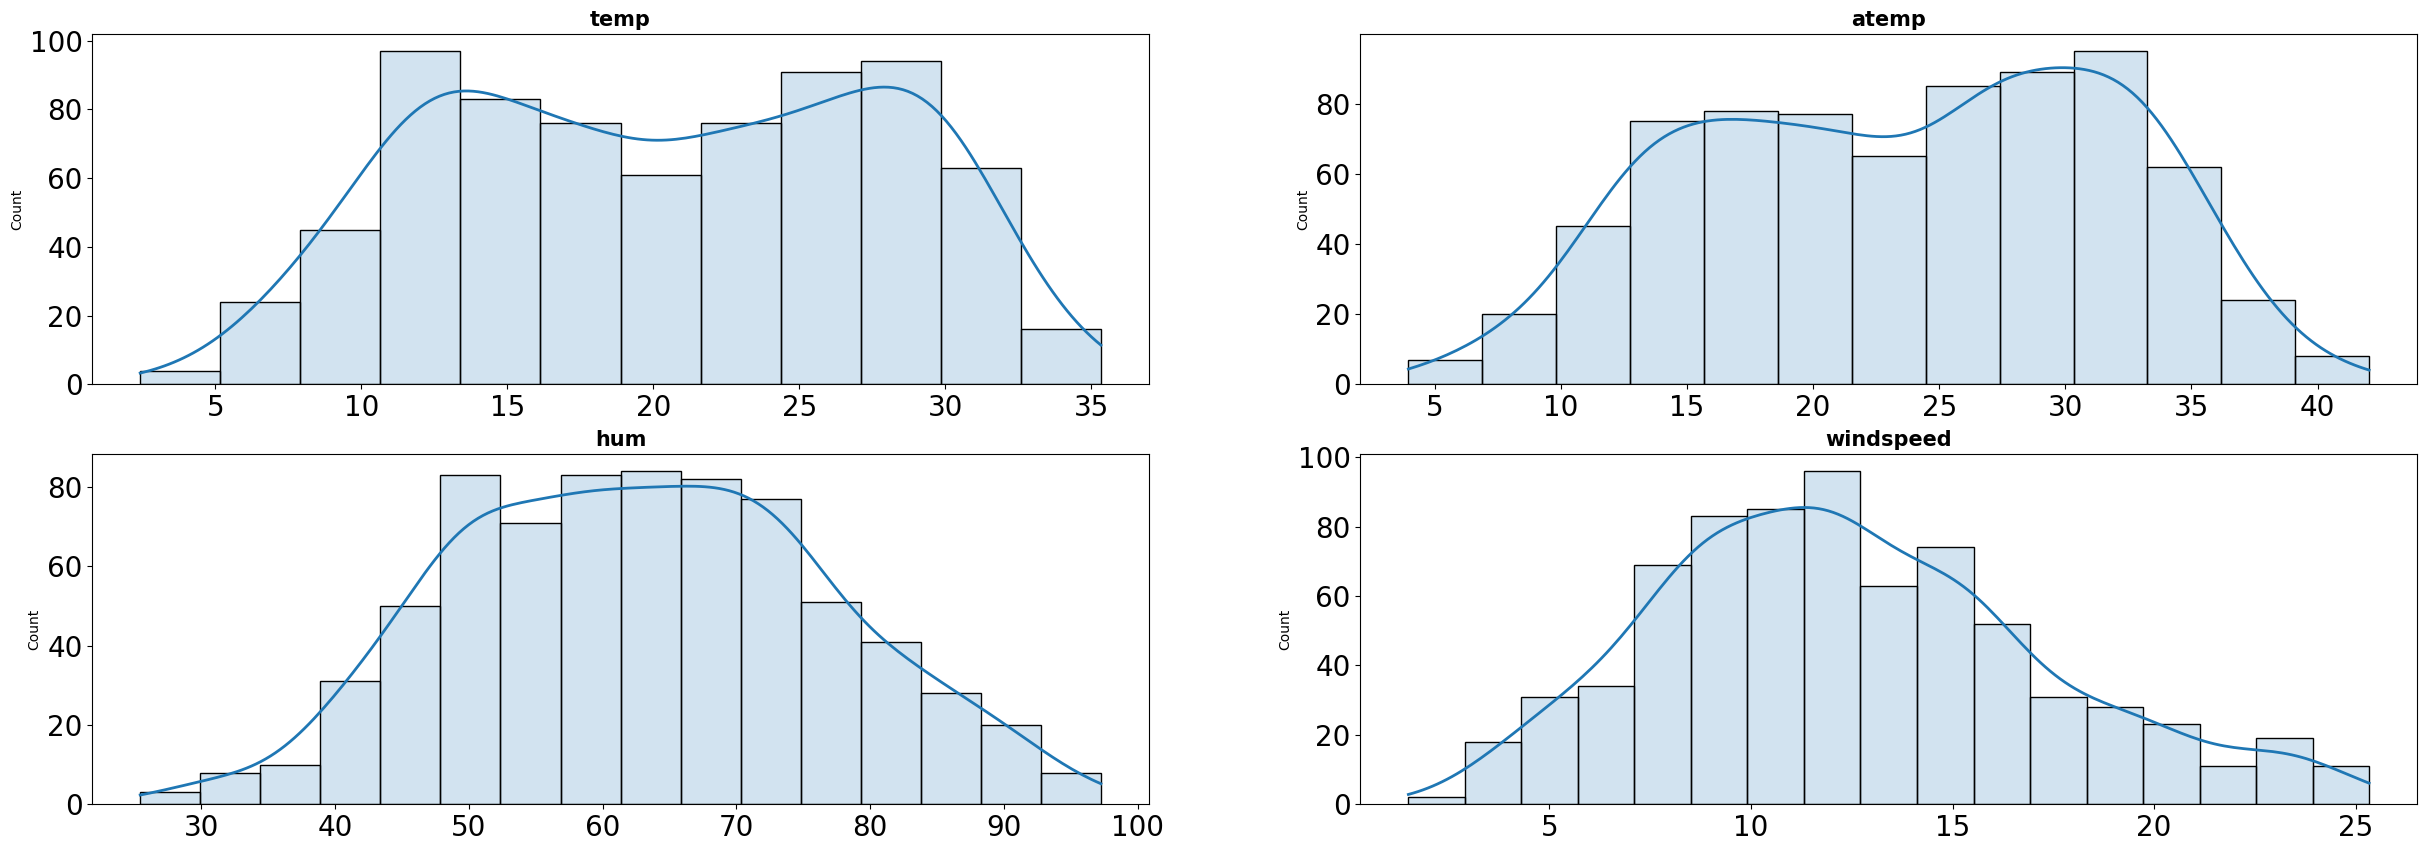

In [7]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

columnas_estandar = numericas.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

In [8]:
robust = RobustScaler()

In [9]:
# ajustamos el modelo utilizando nuestro set de datos
robust.fit(numericas)

RobustScaler()

In [10]:
x_robust= robust.transform(numericas)

In [11]:
numericas_robust= pd.DataFrame(x_robust,columns=numericas.columns)

IndexError: index 4 is out of bounds for axis 0 with size 4

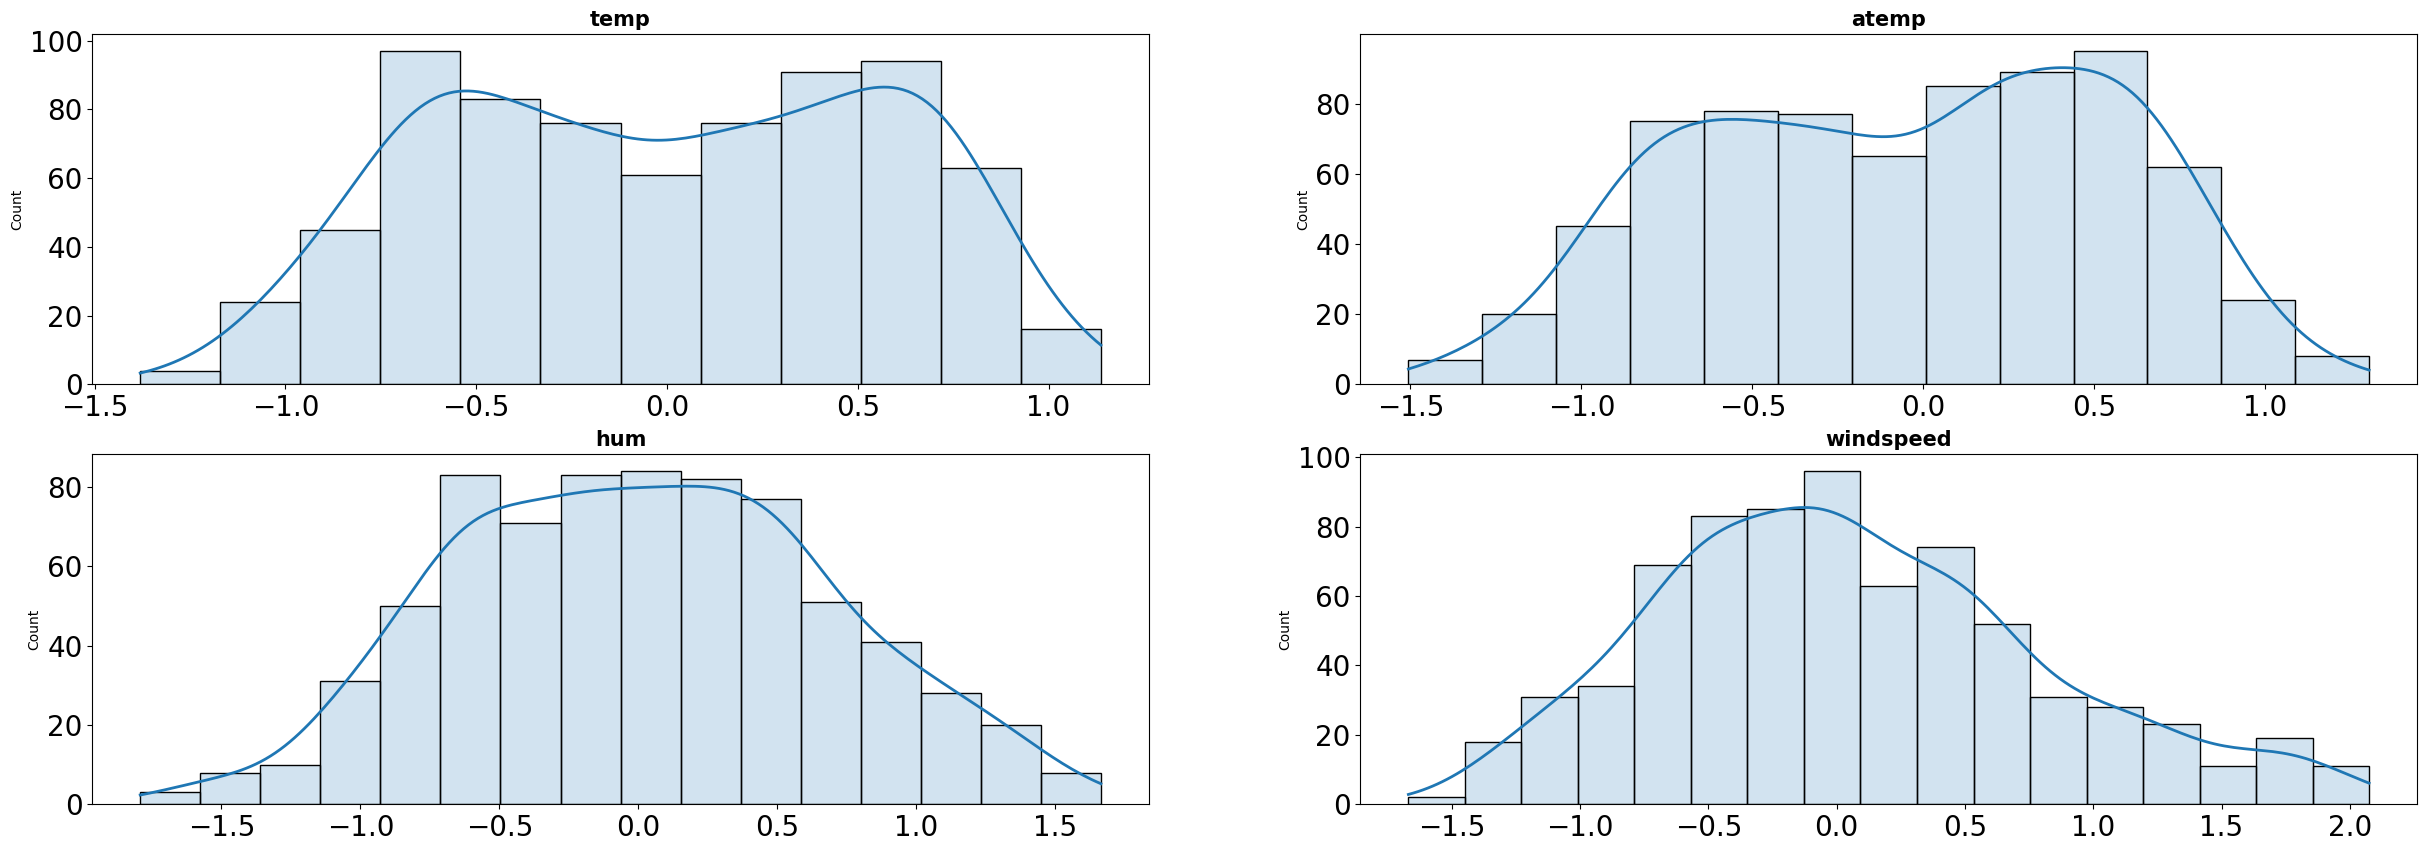

In [12]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 10))

columnas_estandar = numericas_robust.columns
axes = axes.flat

for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout()

In [13]:
columnas_robust=numericas_robust.columns

In [14]:
df.drop(columnas_robust, axis = 1, inplace = True)

In [15]:
df[columnas_robust] = numericas_robust[columnas_robust]

In [16]:
df.head()

,dteday,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter,temp,atemp,hum,windspeed,casual,registered
0,2018-01-01,0,1,1,1,0,0,2,985,0.0,0.0,0.0,1.0,-0.486274,-0.456399,0.863588,-0.216120,-0.494713,-1.319816
1,2018-01-02,0,1,2,0,1,1,2,801,0.0,0.0,0.0,1.0,-0.425690,-0.492863,0.335222,0.711284,-0.751041,-1.312801
2,2018-01-03,0,1,3,0,2,1,1,1349,0.0,0.0,0.0,1.0,-0.949970,-1.098990,-0.910822,0.708863,-0.765139,-1.067733
3,2018-01-04,0,1,4,0,3,1,1,1562,0.0,0.0,0.0,1.0,-0.938563,-1.015201,-0.173433,-0.217699,-0.780519,-0.969093
4,2018-01-05,0,1,5,0,4,1,1,1600,0.0,0.0,0.0,1.0,-0.853992,-0.951952,-0.912344,0.062376,-0.813842,-0.941035


In [17]:
# Creamos los df con lo que se trabajará
df_registered = df.drop(['casual'], axis=1)

In [18]:
df_registered.head(2)

,dteday,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter,temp,atemp,hum,windspeed,registered
0,2018-01-01,0,1,1,1,0,0,2,985,0.0,0.0,0.0,1.0,-0.486274,-0.456399,0.863588,-0.216120,-1.319816
1,2018-01-02,0,1,2,0,1,1,2,801,0.0,0.0,0.0,1.0,-0.425690,-0.492863,0.335222,0.711284,-1.312801


In [19]:
# Creamos los df con lo que se trabajará
df_casual = df.drop(['registered'], axis=1)

In [20]:
df_casual.head(2)

,dteday,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter,temp,atemp,hum,windspeed,casual
0,2018-01-01,0,1,1,1,0,0,2,985,0.0,0.0,0.0,1.0,-0.486274,-0.456399,0.863588,-0.216120,-0.494713
1,2018-01-02,0,1,2,0,1,1,2,801,0.0,0.0,0.0,1.0,-0.425690,-0.492863,0.335222,0.711284,-0.751041


In [21]:
#guardamos en csv y en pkl los df con todos los datos:

df.to_csv('datos/5.cnt_encoding_estandarizacion.csv')
df.to_pickle('datos/5.cnt_encoding_estandarizacion.pkl')